<a href="https://colab.research.google.com/github/robertoricci/Curso-Python-para-Mercado-Financeiro-Trading-com-Dados/blob/main/Modulo_08_Fundamentos_do_Portifolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importando Bibliotecas


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##Selecionando ações e distribuindo pesos

In [ ]:
#Portfolio 1/n
#Período: 01/01/2016 a 30/12/2020

ativos = ['ITSA4.SA', 'PETR4.SA', 'ABEV3.SA', 'VALE3.SA']
pesos = np.array([0.25,0.25,0.25,0.25])

In [ ]:
carteira_precos = pd.read_csv('carteira_precos.csv')
carteira_precos

,Date,ABEV3.SA,ITSA4.SA,PETR4.SA,VALE3.SA
0,2016-01-04,14.220699,3.148402,3.027316,8.448511
1,2016-01-05,14.443801,3.200876,2.943592,8.335332
2,2016-01-06,14.303331,3.229498,2.820208,7.722830
3,2016-01-07,13.923228,3.181795,2.758516,7.263455
4,2016-01-08,14.105015,3.181795,2.762922,7.017122
...,...,...,...,...,...
1239,2020-12-21,14.770419,8.988072,12.834467,67.598900
1240,2020-12-22,14.856628,9.003868,12.957965,67.661163
1241,2020-12-23,14.847050,9.217117,13.276214,67.988029
1242,2020-12-28,15.105676,9.319796,13.385463,67.949104


In [ ]:
carteira_precos.index = carteira_precos['Date']
carteira_precos.drop(columns={'Date'},inplace=True)
carteira_precos

,ABEV3.SA,ITSA4.SA,PETR4.SA,VALE3.SA
Date,,,,
2016-01-04,14.220699,3.148402,3.027316,8.448511
2016-01-05,14.443801,3.200876,2.943592,8.335332
2016-01-06,14.303331,3.229498,2.820208,7.722830
2016-01-07,13.923228,3.181795,2.758516,7.263455
2016-01-08,14.105015,3.181795,2.762922,7.017122
...,...,...,...,...
2020-12-21,14.770419,8.988072,12.834467,67.598900
2020-12-22,14.856628,9.003868,12.957965,67.661163
2020-12-23,14.847050,9.217117,13.276214,67.988029


##Calculando Retornos do Portfólio

In [ ]:
retorno_precos = carteira_precos.pct_change()
retorno_precos

,ABEV3.SA,ITSA4.SA,PETR4.SA,VALE3.SA
Date,,,,
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,0.015689,0.016667,-0.027656,-0.013396
2016-01-06,-0.009725,0.008942,-0.041916,-0.073483
2016-01-07,-0.026574,-0.014771,-0.021875,-0.059483
2016-01-08,0.013056,0.000000,0.001597,-0.033914
...,...,...,...,...
2020-12-21,-0.027743,-0.015571,-0.038434,-0.010706
2020-12-22,0.005837,0.001757,0.009622,0.000921
2020-12-23,-0.000645,0.023684,0.024560,0.004831


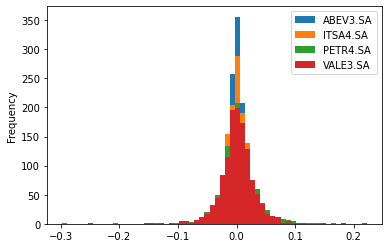

In [ ]:
retorno_precos.plot.hist(bins=60);

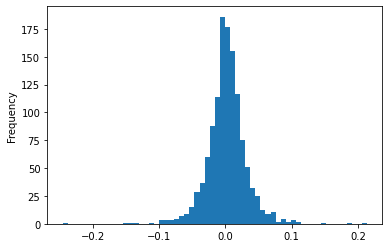

In [ ]:
retorno_precos['VALE3.SA'].plot.hist(bins=60);

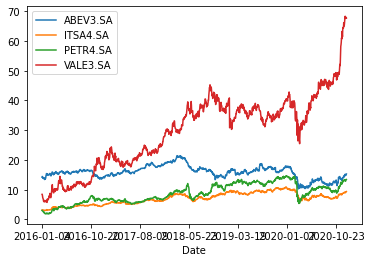

In [ ]:
carteira_precos.plot();

In [ ]:
retorno_acm_acoes = (1+retorno_precos).cumprod()

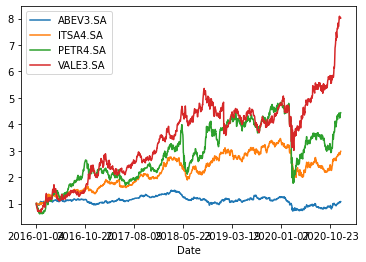

In [ ]:
retorno_acm_acoes.plot()

In [ ]:
retorno_carteira = (retorno_precos * pesos).sum(axis=1)

In [ ]:
retorno_portfolio = pd.DataFrame()
retorno_portfolio['Retornos'] = retorno_carteira
retorno_portfolio

,Retornos
Date,
2016-01-04,0.000000
2016-01-05,-0.002174
2016-01-06,-0.029045
2016-01-07,-0.030676
2016-01-08,-0.004815
...,...
2020-12-21,-0.023114
2020-12-22,0.004534
2020-12-23,0.013108


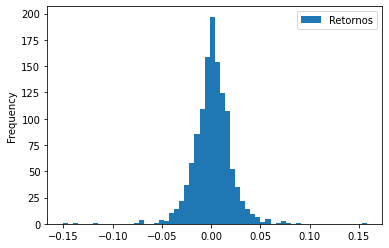

In [ ]:
retorno_portfolio.plot.hist(bins=60);

In [ ]:
retorno_portfolio.describe()

,Retornos
count,1244.000000
mean,0.001299
std,0.019633
min,-0.150956
25%,-0.008286
50%,0.001331
75%,0.011687
max,0.158211


In [ ]:
#Retorno acumulado da carteira

retorno_acm_carteira = (1+retorno_portfolio).cumprod()

In [ ]:
retorno_acm_carteira.head()

,Retornos
Date,
2016-01-04,1.000000
2016-01-05,0.997826
2016-01-06,0.968843
2016-01-07,0.939123
2016-01-08,0.934601


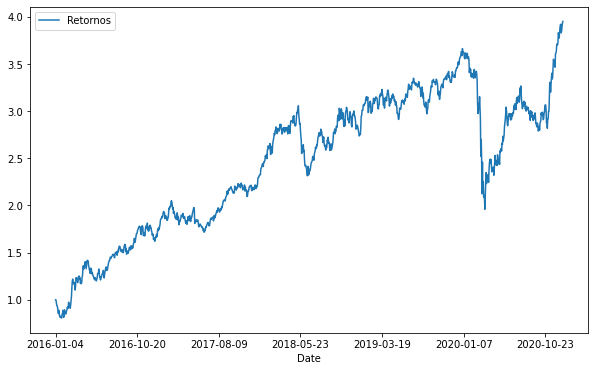

In [ ]:
retorno_acm_carteira.plot(figsize=(10,6));

##Calculando a volatilidade do portfólio

In [ ]:
cov_matrix = retorno_precos.cov()

In [ ]:
cov_matrix

,ABEV3.SA,ITSA4.SA,PETR4.SA,VALE3.SA
ABEV3.SA,0.000322,0.000180,0.000238,0.000146
ITSA4.SA,0.000180,0.000419,0.000413,0.000225
PETR4.SA,0.000238,0.000413,0.001079,0.000509
VALE3.SA,0.000146,0.000225,0.000509,0.000928


In [ ]:
retorno_precos.var()

ABEV3.SA    0.000322
ITSA4.SA    0.000419
PETR4.SA    0.001079
VALE3.SA    0.000928
dtype: float64

In [ ]:
#Volatilidade diária da carteira

vol_carteira = np.sqrt(np.dot(pesos.T, np.dot(cov_matrix,pesos)))

In [ ]:
vol_carteira

0.019641034809602012

In [ ]:
vol_ano = vol_carteira*np.sqrt(252)

In [ ]:
vol_ano

0.3117917615890187

##Benchmark da carteira

In [ ]:
ibov = pd.read_csv('ibov3.csv')
ibov

,Date,Close
0,2016-01-04,42141.0
1,2016-01-05,42419.0
2,2016-01-06,41773.0
3,2016-01-07,40695.0
4,2016-01-08,40612.0
...,...,...
1232,2020-12-22,116348.0
1233,2020-12-23,117857.0
1234,2020-12-28,119051.0
1235,2020-12-29,119475.0


In [ ]:
ibov.index = ibov['Date']
ibov.drop(columns={'Date'},inplace=True)
ibov

,Close
Date,
2016-01-04,42141.0
2016-01-05,42419.0
2016-01-06,41773.0
2016-01-07,40695.0
2016-01-08,40612.0
...,...
2020-12-22,116348.0
2020-12-23,117857.0
2020-12-28,119051.0


In [ ]:
ibov.rename(columns={'Close':'Ibov'},inplace=True)
ibov

,Ibov
Date,
2016-01-04,42141.0
2016-01-05,42419.0
2016-01-06,41773.0
2016-01-07,40695.0
2016-01-08,40612.0
...,...
2020-12-22,116348.0
2020-12-23,117857.0
2020-12-28,119051.0


In [ ]:
ibov_retornos = ibov.pct_change()
ibov_acm = (1+ibov_retornos).cumprod()
ibov_acm

,Ibov
Date,
2016-01-04,NaN
2016-01-05,1.006597
2016-01-06,0.991267
2016-01-07,0.965687
2016-01-08,0.963717
...,...
2020-12-22,2.760922
2020-12-23,2.796730
2020-12-28,2.825063


In [ ]:
#Criar df benchmark

benchmark = pd.merge(retorno_acm_carteira, ibov_acm, how='inner', right_index=True, left_index=True)
benchmark

,Retornos,Ibov
Date,,
2016-01-04,1.000000,NaN
2016-01-05,0.997826,1.006597
2016-01-06,0.968843,0.991267
2016-01-07,0.939123,0.965687
2016-01-08,0.934601,0.963717
...,...,...
2020-12-21,3.830515,2.753043
2020-12-22,3.847884,2.760922
2020-12-23,3.898320,2.796730


In [ ]:
benchmark.dropna(inplace=True)

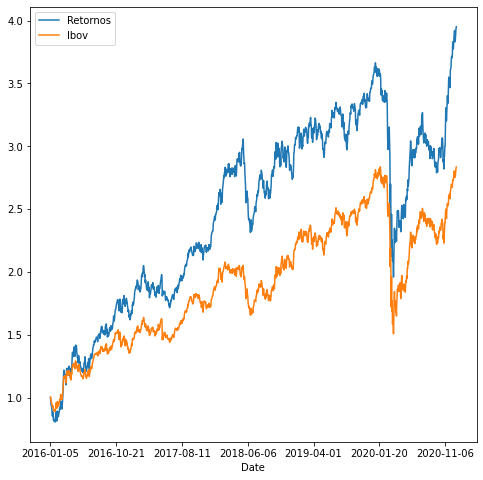

In [ ]:
benchmark.plot(figsize=(8,8));

##Beta da Carteira

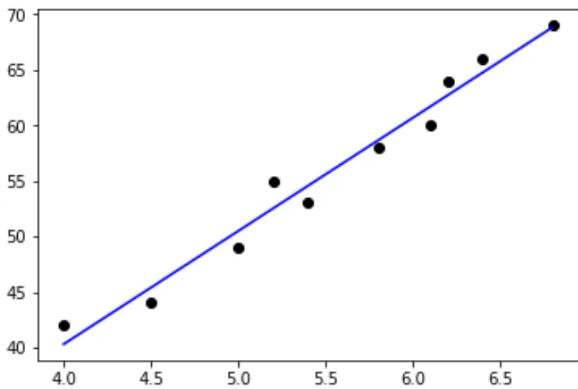

In [ ]:
#E(x) = a + bx + u

In [ ]:
retorno_carteira = pd.DataFrame(retorno_carteira, columns=['Retorno'])
retorno_carteira

,Retorno
Date,
2016-01-04,0.000000
2016-01-05,-0.002174
2016-01-06,-0.029045
2016-01-07,-0.030676
2016-01-08,-0.004815
...,...
2020-12-21,-0.023114
2020-12-22,0.004534
2020-12-23,0.013108


In [ ]:
ibov_retornos

,Ibov
Date,
2016-01-04,NaN
2016-01-05,0.006597
2016-01-06,-0.015229
2016-01-07,-0.025806
2016-01-08,-0.002040
...,...
2020-12-22,0.002862
2020-12-23,0.012970
2020-12-28,0.010131


In [ ]:
beta_carteira = pd.merge(retorno_carteira, ibov_retornos, how='inner', left_index=True, right_index=True)
beta_carteira

,Retorno,Ibov
Date,,
2016-01-04,0.000000,NaN
2016-01-05,-0.002174,0.006597
2016-01-06,-0.029045,-0.015229
2016-01-07,-0.030676,-0.025806
2016-01-08,-0.004815,-0.002040
...,...,...
2020-12-21,-0.023114,-0.014132
2020-12-22,0.004534,0.002862
2020-12-23,0.013108,0.012970


In [ ]:
beta_carteira.dropna(inplace=True)

In [ ]:
import statsmodels.api as sm

In [ ]:
Y = beta_carteira['Retorno']
X = beta_carteira['Ibov']

X = sm.add_constant(X)

modelo = sm.OLS(Y, X)
resultado = modelo.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
resultado

In [ ]:
resultado.params[0]

0.0002639180286425062

In [ ]:
resultado.params[1]

1.044578627711906

In [ ]:
beta_carteira = resultado.params[1]
beta_carteira

1.044578627711906

##Janela de Tempo

In [ ]:
mm_retornos = retorno_carteira.rolling(window=20).mean()
mm_retornos

,Retorno
Date,
2016-01-04,NaN
2016-01-05,NaN
2016-01-06,NaN
2016-01-07,NaN
2016-01-08,NaN
...,...
2020-12-21,0.005432
2020-12-22,0.004140
2020-12-23,0.005056


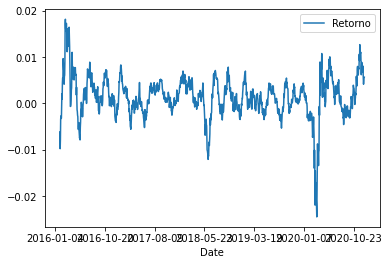

In [ ]:
mm_retornos.plot();

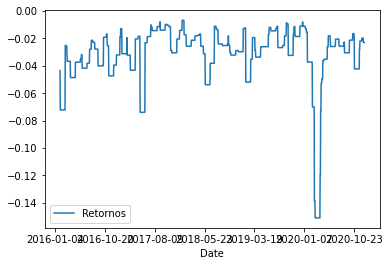

In [ ]:
rolling_drawdown = retorno_portfolio.rolling(window=20).min()
rolling_drawdown.plot();

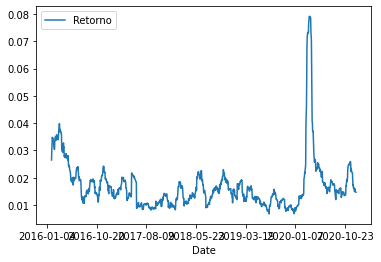

In [ ]:
rolling_vol = retorno_carteira.rolling(window=20).std()
rolling_vol.plot();

##Value at Risk

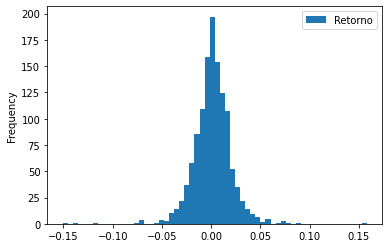

In [ ]:
retorno_carteira.plot.hist(bins=60);

In [ ]:
#VaR Historico

var_95 = np.nanpercentile(retorno_portfolio,5)
var_98 = np.nanpercentile(retorno_portfolio, 2)
var_99 = np.nanpercentile(retorno_portfolio, 1)

print(var_95, var_98, var_99)

-0.026708227213022396 -0.038148777501337224 -0.0481163051432019


In [ ]:
#VaR Paramétrico

from scipy.stats import norm

In [ ]:
#Parametros da amostra

media_retorno_portfolio = np.mean(retorno_portfolio)
desvio_carteira = vol_carteira

In [ ]:
#VaR 90%
var_p_90 = norm.ppf(1-0.9, media_retorno_portfolio, desvio_carteira)
var_p_90

array([-0.02387221])

In [ ]:
var_p_98 = norm.ppf(1-0.98, media_retorno_portfolio, desvio_carteira)
var_p_98

array([-0.03903896])

##CAGR Compound Annual Growth Rate

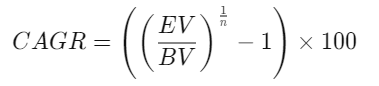

In [ ]:
retorno_anualizado = (carteira_precos.iloc[-1]-carteira_precos.iloc[0])/(carteira_precos.iloc[0])

In [ ]:
retorno_anualizado

ABEV3.SA    0.074356
ITSA4.SA    1.977727
PETR4.SA    3.435682
VALE3.SA    7.020624
dtype: float64

In [ ]:
retorno_an_carteira = ((1+retorno_anualizado)**(12/60))-1
retorno_an_carteira

ABEV3.SA    0.014448
ITSA4.SA    0.243876
PETR4.SA    0.347076
VALE3.SA    0.516497
dtype: float64

In [ ]:
retorno_an_carteira = retorno_an_carteira.dot(pesos)
retorno_an_carteira

0.28047411918838955

##Sharpe Ratio

<img src="https://latex.codecogs.com/svg.image?Sharpe&space;Ratio&space;=&space;\frac{(R_{p}-R_{f})}&space;{\sigma_{p}}" title="https://latex.codecogs.com/svg.image?Sharpe Ratio = \frac{(R_{p}-R_{f})} {\sigma_{p}}" />

In [ ]:
#Rf

selic = 0.02

In [ ]:
sharpe_ratio = ((retorno_portfolio.mean()*252)-selic)/(vol_ano)
sharpe_ratio

Retornos    0.985579
dtype: float64

##Sortino Ratio

<img src="https://latex.codecogs.com/svg.image?Sortino&space;=&space;\frac{(R_{p}-R_{f})}{Semivariance}" title="https://latex.codecogs.com/svg.image?Sortino = \frac{(R_{p}-R_{f})}{Semivariance}" />

In [ ]:
sortino = ((retorno_portfolio.mean()*252)-selic)/(retorno_portfolio[retorno_portfolio<0].std()*np.sqrt(252))
sortino

Retornos    1.295
dtype: float64

##Max Drawdown

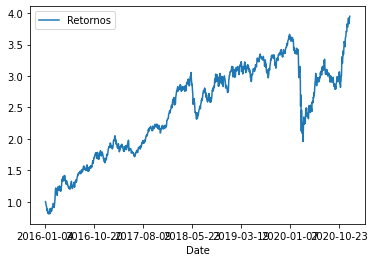

In [ ]:
retorno_acm_carteira.plot();

In [ ]:
pico = retorno_acm_carteira.expanding(min_periods=1).max()
dd = (retorno_acm_carteira/pico)-1
drawdown = dd.min()
drawdown

Retornos   -0.46509
dtype: float64

##Calmar Ratio

<img src="https://latex.codecogs.com/svg.image?Calmar&space;Ratio&space;=&space;\frac{(R_{p}-R_{f})}{Max&space;Drawdown}" title="https://latex.codecogs.com/svg.image?Calmar Ratio = \frac{(R_{p}-R_{f})}{Max Drawdown}" />

In [ ]:
calmar = ((retorno_portfolio.mean()*252)-selic)/abs(drawdown)
calmar

Retornos    0.660722
dtype: float64